In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df_w_genres = pd.read_csv('data_w_genres.csv')
df_year = pd.read_csv('data_by_year.csv')
df_by_genres = pd.read_csv('data_by_genres.csv')
df_artist = pd.read_csv('data_by_artist.csv')

In [27]:
df.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


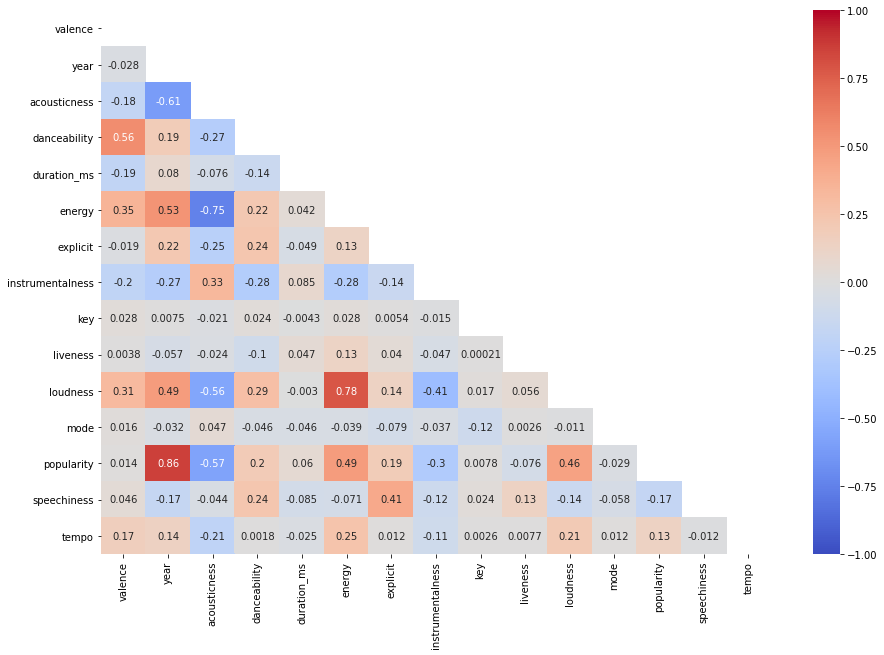

In [33]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    mask=mask,
    vmin=-1.,
    vmax=1.
);

### Of all the metrics contained in this table, popularity is probably the most interesting as a dependent variable. It may be interesting to augment this popularity rating with other metrics - how else could we quantify a song being "popular"? 
- Number of plays
- Landing on the Billboard Top 100 charts
- Prominence in pop culture (harder to quantify, but I can imagine something like "propensity to be played at parties", so perhaps volume at which the song is played)

#### Let's start with a simple one and bring in the Billboard Top 100 Chart for every week 

In [34]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [42]:
import requests
from bs4 import BeautifulSoup
r = requests.get('https://www.billboard.com/charts/year-end/top-hummed')

In [50]:
soup = BeautifulSoup(r.text, 'html.parser')
soup

<!DOCTYPE html>

<html class="" lang="">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<title>GOOGLE’S TOP HUMMED SONGS 2020 Chart | Billboard</title>
<meta content="GOOGLE’S TOP HUMMED SONGS 2020 Chart" name="title" property="title">
<meta content="@billboard" name="twitter:site"/>
<meta content="Billboard" property="og:site_name">
<meta content="article" property="og:type">
<link href="/manifest.json" rel="manifest"/>
<style>
        .chart-pro-access {
            background-image: url('https://www.billboard.com/assets/1608590758/images/piano/chart-pro-access-mb.png?d78fa00e3ca1a63edbdf');
        }

        @media (min-width: 769px) {
            .chart-pro-access {
                background-image: url('https://www.billboard.com/assets/1608590758/images/piano/chart-pro-access-dk.png?d78fa00e3ca1a63edbdf');
            }
        }
    </style>
<script asyn

In [56]:
# soup.find('')
soup.findAll("span", {"class_": "chart-element__information__song text--truncate color--primary"})

[]